__Author: Christian Camilo Urcuqui López__

__Date: 3 May 2016__

## Packages

In [64]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
import torch
#from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import tree
import pandas as pd
from sklearn.externals import joblib
import pickle
import numpy as np
import seaborn as sns
#from joblib import dump, load

## Data Analysis

### Static Analysis Approach

In [5]:
df = pd.read_csv('../../datasets/android_permissions.csv', header=0, sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Columns: 331 entries, android to type
dtypes: int64(331)
memory usage: 1.0 MB


In [12]:
df = df.astype(int).copy()

In [30]:
df.type.value_counts()

1    199
0    199
Name: type, dtype: int64

In [62]:
df.head(2)

,android,android.app.cts.permission.TEST_GRANTED,android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE,android.os.cts.permission.TEST_GRANTED,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_ALL_EXTERNAL_STORAGE,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_COARSE_LOCATION,...,com.android.voicemail.permission.WRITE_VOICEMAIL,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.C2D_MESSAGE,org.chromium.chrome.shell.permission.DEBUG,org.chromium.chrome.shell.permission.SANDBOX,org.chromium.chromecast.shell.permission.SANDBOX,org.chromium.content_shell.permission.SANDBOX,test_permission,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Let's get the top 10 of permissions that are used for malware

In [17]:
df[df.type==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Columns: 331 entries, android to type
dtypes: int32(331)
memory usage: 258.9 KB


*Malicious*

In [15]:
pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1:11]

android.permission.INTERNET                  195
android.permission.READ_PHONE_STATE          190
android.permission.ACCESS_NETWORK_STATE      167
android.permission.WRITE_EXTERNAL_STORAGE    136
android.permission.ACCESS_WIFI_STATE         135
android.permission.READ_SMS                  124
android.permission.WRITE_SMS                 104
android.permission.RECEIVE_BOOT_COMPLETED    102
android.permission.ACCESS_COARSE_LOCATION     80
android.permission.CHANGE_WIFI_STATE          75
dtype: int64

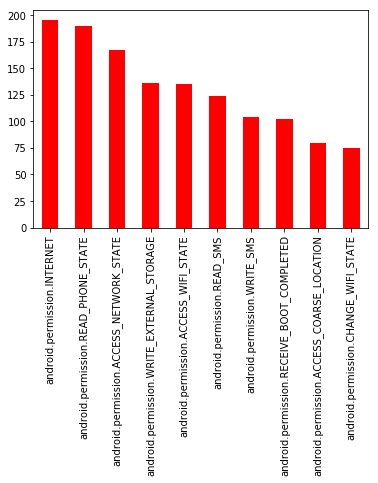

In [29]:
pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1:11].plot.bar(color="red")

*Benign*

In [32]:
pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[:10]

android.permission.INTERNET                  104
android.permission.WRITE_EXTERNAL_STORAGE     76
android.permission.ACCESS_NETWORK_STATE       62
android.permission.WAKE_LOCK                  36
android.permission.RECEIVE_BOOT_COMPLETED     30
android.permission.ACCESS_WIFI_STATE          29
android.permission.READ_PHONE_STATE           24
android.permission.VIBRATE                    21
android.permission.ACCESS_FINE_LOCATION       18
android.permission.READ_EXTERNAL_STORAGE      15
dtype: int64

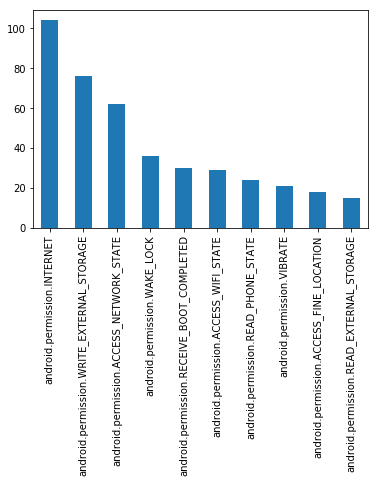

In [31]:
pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[:10].plot.bar()

#### Machine Learning Modeling

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:330], df['type'], test_size=0.20, random_state=42)

In [5]:
X_train.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 3 to 102
Data columns (total 329 columns):
android.app.cts.permission.TEST_GRANTED                          int32
android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE      int32
android.os.cts.permission.TEST_GRANTED                           int32
android.permission.ACCESS_ALL_DOWNLOADS                          int32
android.permission.ACCESS_ALL_EXTERNAL_STORAGE                   int32
android.permission.ACCESS_BLUETOOTH_SHARE                        int32
android.permission.ACCESS_CACHE_FILESYSTEM                       int32
android.permission.ACCESS_CHECKIN_PROPERTIES                     int32
android.permission.ACCESS_COARSE_LOCATION                        int32
android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY           int32
android.permission.ACCESS_DOWNLOAD_MANAGER                       int32
android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED              int32
android.permission.ACCESS_DRM_CERTIFICATES

##### Naive Bayes algorithm

In [64]:
# Naive Bayes algorithm
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# pred
pred = gnb.predict(X_test)

# accuracy
accuracy = accuracy_score(pred, y_test)
print("naive_bayes")
print(accuracy)
print(classification_report(pred, y_test, labels=None))


naive_bayes
0.8375
             precision    recall  f1-score   support

          0       0.91      0.76      0.83        41
          1       0.78      0.92      0.85        39

avg / total       0.85      0.84      0.84        80



##### KNeighborsClassifier

In [65]:
# kneighbors algorithm
neigh = KNeighborsClassifier(n_neighbors=2)
neigh_two = KNeighborsClassifier(n_neighbors=3)
neigh_three = KNeighborsClassifier(n_neighbors=4)
neigh_four = KNeighborsClassifier(n_neighbors=6)

neigh.fit(X_train, y_train)
neigh_two.fit(X_train, y_train)
neigh_three.fit(X_train, y_train)
neigh_four.fit(X_train, y_train)

pred = neigh.predict(X_test)
pred_two = neigh_two.predict(X_test)
pred_three = neigh_three.predict(X_test)
pred_four = neigh_four.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
accuracy_two = accuracy_score(pred_two, y_test)
accuracy_three = accuracy_score(pred_three, y_test)
accuracy_four = accuracy_score(pred_four, y_test)

print("kneighbors 2")
print(accuracy)
print(classification_report(pred, y_test, labels=None))
print("")
print("kneighbors 3")
print(accuracy_two)
print(classification_report(pred_two, y_test, labels=None))
print("")
print("kneighbors 4")
print(accuracy_three)
print(classification_report(pred_three, y_test, labels=None))
print("kneighbors 6")
print(accuracy_four)
print(classification_report(pred_four, y_test, labels=None))


kneighbors 2
0.9
             precision    recall  f1-score   support

          0       0.97      0.82      0.89        40
          1       0.85      0.97      0.91        40

avg / total       0.91      0.90      0.90        80


kneighbors 3
0.8875
             precision    recall  f1-score   support

          0       0.94      0.82      0.88        39
          1       0.85      0.95      0.90        41

avg / total       0.89      0.89      0.89        80


kneighbors 4
0.85
             precision    recall  f1-score   support

          0       0.94      0.76      0.84        42
          1       0.78      0.95      0.86        38

avg / total       0.87      0.85      0.85        80

kneighbors 6
0.85
             precision    recall  f1-score   support

          0       0.94      0.76      0.84        42
          1       0.78      0.95      0.86        38

avg / total       0.87      0.85      0.85        80



##### Decision Tree

In [5]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Read the csv test file

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.95
             precision    recall  f1-score   support

          0       0.97      0.92      0.94        36
          1       0.93      0.98      0.96        44

avg / total       0.95      0.95      0.95        80



In [9]:
#we are going to save the model 
dump(clf, 'defense.joblib') 

['defense.joblib']

In [10]:
# lets load and prove it again
clf = load('defense.joblib') 
pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.95
             precision    recall  f1-score   support

          0       0.97      0.92      0.94        36
          1       0.93      0.98      0.96        44

avg / total       0.95      0.95      0.95        80



#### Neural network


In [6]:
cat_to_name = {"0": "benign", "1": "malware"}

In [7]:
X_train_tensor = torch.tensor(X_train.values).int()
X_test_tensor = torch.tensor(X_test.values).int()
y_train_tensor = torch.tensor(y_train.values).int()
y_test_tensor = torch.tensor(y_test.values).int()

In [8]:
X_train_tensor = X_train_tensor.reshape(-1, 329)
X_test_tensor = X_test_tensor.reshape(-1, 329)
y_train_tensor = y_train_tensor.reshape(-1, 1)
y_test_tensor = y_test_tensor.reshape(-1, 1)

In [9]:
X_train_tensor

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32)

In [10]:
from torch import nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.fc1 = nn.Linear(329, 128)
        self.fc2 = nn.Linear(128, 64)
        #self.dout = nn.Dropout(0.2)
        # output layer
        self.fc3 = nn.Linear(64, 1)
        
    def forward(self, x):
        # Hidden layer with ReLu activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # Output layer with softmax activation        
        x = self.fc3(x)
        return x

In [11]:
model = Network()
model

Network(
  (fc1): Linear(in_features=329, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)

In [12]:
import torch.optim as optim
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 5
position = 1
batch_size= 10

for e in range(epochs):
    running_loss = 0
    model.train()
    for beg_i in range(0, X_train_tensor.size(0), batch_size):
        x_batch = X_train_tensor[beg_i:beg_i + batch_size, :]
        y_batch = y_train_tensor[beg_i:beg_i + batch_size, :]
        
        optimizer.zero_grad()
        output =  model(x_batch.float())        
        loss = criterion(output,y_batch.float())        
        loss.backward()
        optimizer.step()
        position += 1
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(X_train_tensor)}")

Training loss: 0.016105705145863618
Training loss: 0.005543735778872978
Training loss: 0.003785331997838832
Training loss: 0.0035040460625054234
Training loss: 0.002874317849874965


In [19]:
test_loss = 0.0
class_correct = list(0 for i in range(2))
class_total = list(0. for i in range(2))
model.eval()
# iterate over test data
for index in range(0, X_test_tensor.size(0)):       
    
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(X_test_tensor[index].float())
    if output > 0.5 :
        prediction = 1 
    else:
        prediction = 0     
    
    # calculate the batch loss
    loss = criterion(output, y_test_tensor[index].float())
    # update test loss 
    test_loss += loss.item()
    # convert output probabilities to predicted class
    #_, pred = torch.max(output, 1)
    
    # compare predictions to true label
    #correct_tensor = pred.eq(y_test_tensor[index].long())
    #correct = np.squeeze(correct_tensor.numpy())
    
    label = y_test_tensor.data[index].numpy()[0]  
    
    if label == prediction:
        class_correct[label] += 1

    class_total[label] += 1
         
# average test loss
test_loss = test_loss/len(X_test_tensor)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(0,2):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            cat_to_name[str(i)], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (pred[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.063895

Test Accuracy of benign: 97% (33/34)
Test Accuracy of malware: 91% (42/46)

Test Accuracy (Overall): 93% (75/80)


### Dynamic Analysis

The next analysis is based on Jhoan's work

https://github.com/jsvillatech/PDG

### Data cleaning

In [6]:
data= pd.read_csv("../../datasets/android_traffic.csv",header=0,sep=';')
data.head() 

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,NaN,NaN,NaN,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,NaN,NaN,NaN,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,NaN,NaN,NaN,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,NaN,NaN,NaN,7,1,benign


In [7]:
data.shape

(7845, 17)

In [8]:
data.columns

Index(['name', 'tcp_packets', 'dist_port_tcp', 'external_ips', 'vulume_bytes',
       'udp_packets', 'tcp_urg_packet', 'source_app_packets',
       'remote_app_packets', 'source_app_bytes', 'remote_app_bytes',
       'duracion', 'avg_local_pkt_rate', 'avg_remote_pkt_rate',
       'source_app_packets.1', 'dns_query_times', 'type'],
      dtype='object')

In [9]:
data.type.value_counts()

benign       4704
malicious    3141
Name: type, dtype: int64

In [10]:
data.isna().sum()

name                       0
tcp_packets                0
dist_port_tcp              0
external_ips               0
vulume_bytes               0
udp_packets                0
tcp_urg_packet             0
source_app_packets         0
remote_app_packets         0
source_app_bytes           0
remote_app_bytes           0
duracion                7845
avg_local_pkt_rate      7845
avg_remote_pkt_rate     7845
source_app_packets.1       0
dns_query_times            0
type                       0
dtype: int64

Existen tres variables sin datos

In [14]:
data = data.drop(['duracion','avg_local_pkt_rate','avg_remote_pkt_rate'], axis=1).copy()

In [15]:
len(data.columns)

14

In [16]:
data.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times
count,7845.000000,7845.000000,7845.000000,7.845000e+03,7845.000000,7845.000000,7845.000000,7845.000000,7.845000e+03,7.845000e+03,7845.000000,7845.000000
mean,147.578713,7.738177,2.748502,1.654375e+04,0.056724,0.000255,152.911918,194.706310,2.024967e+05,1.692260e+04,152.911918,4.898917
std,777.920084,51.654222,2.923005,8.225650e+04,1.394046,0.015966,779.034618,1068.112696,1.401076e+06,8.238182e+04,779.034618,18.900478
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,6.900000e+01,1.000000,0.000000
25%,6.000000,0.000000,1.000000,8.880000e+02,0.000000,0.000000,7.000000,7.000000,9.340000e+02,1.046000e+03,7.000000,1.000000
50%,25.000000,0.000000,2.000000,3.509000e+03,0.000000,0.000000,30.000000,24.000000,4.090000e+03,3.803000e+03,30.000000,3.000000
75%,93.000000,0.000000,4.000000,1.218900e+04,0.000000,0.000000,98.000000,92.000000,2.624400e+04,1.261000e+04,98.000000,5.000000
max,37143.000000,2167.000000,43.000000,4.226790e+06,65.000000,1.000000,37150.000000,45928.000000,6.823516e+07,4.227323e+06,37150.000000,913.000000


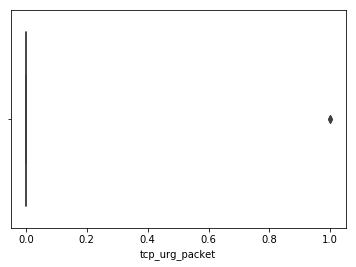

In [17]:
sns.boxplot(data.tcp_urg_packet)

In [18]:
data.loc[data.tcp_urg_packet > 0].shape[0]

2

In [21]:
data = data.drop(columns=["tcp_urg_packet"], axis=1).copy()
data.shape

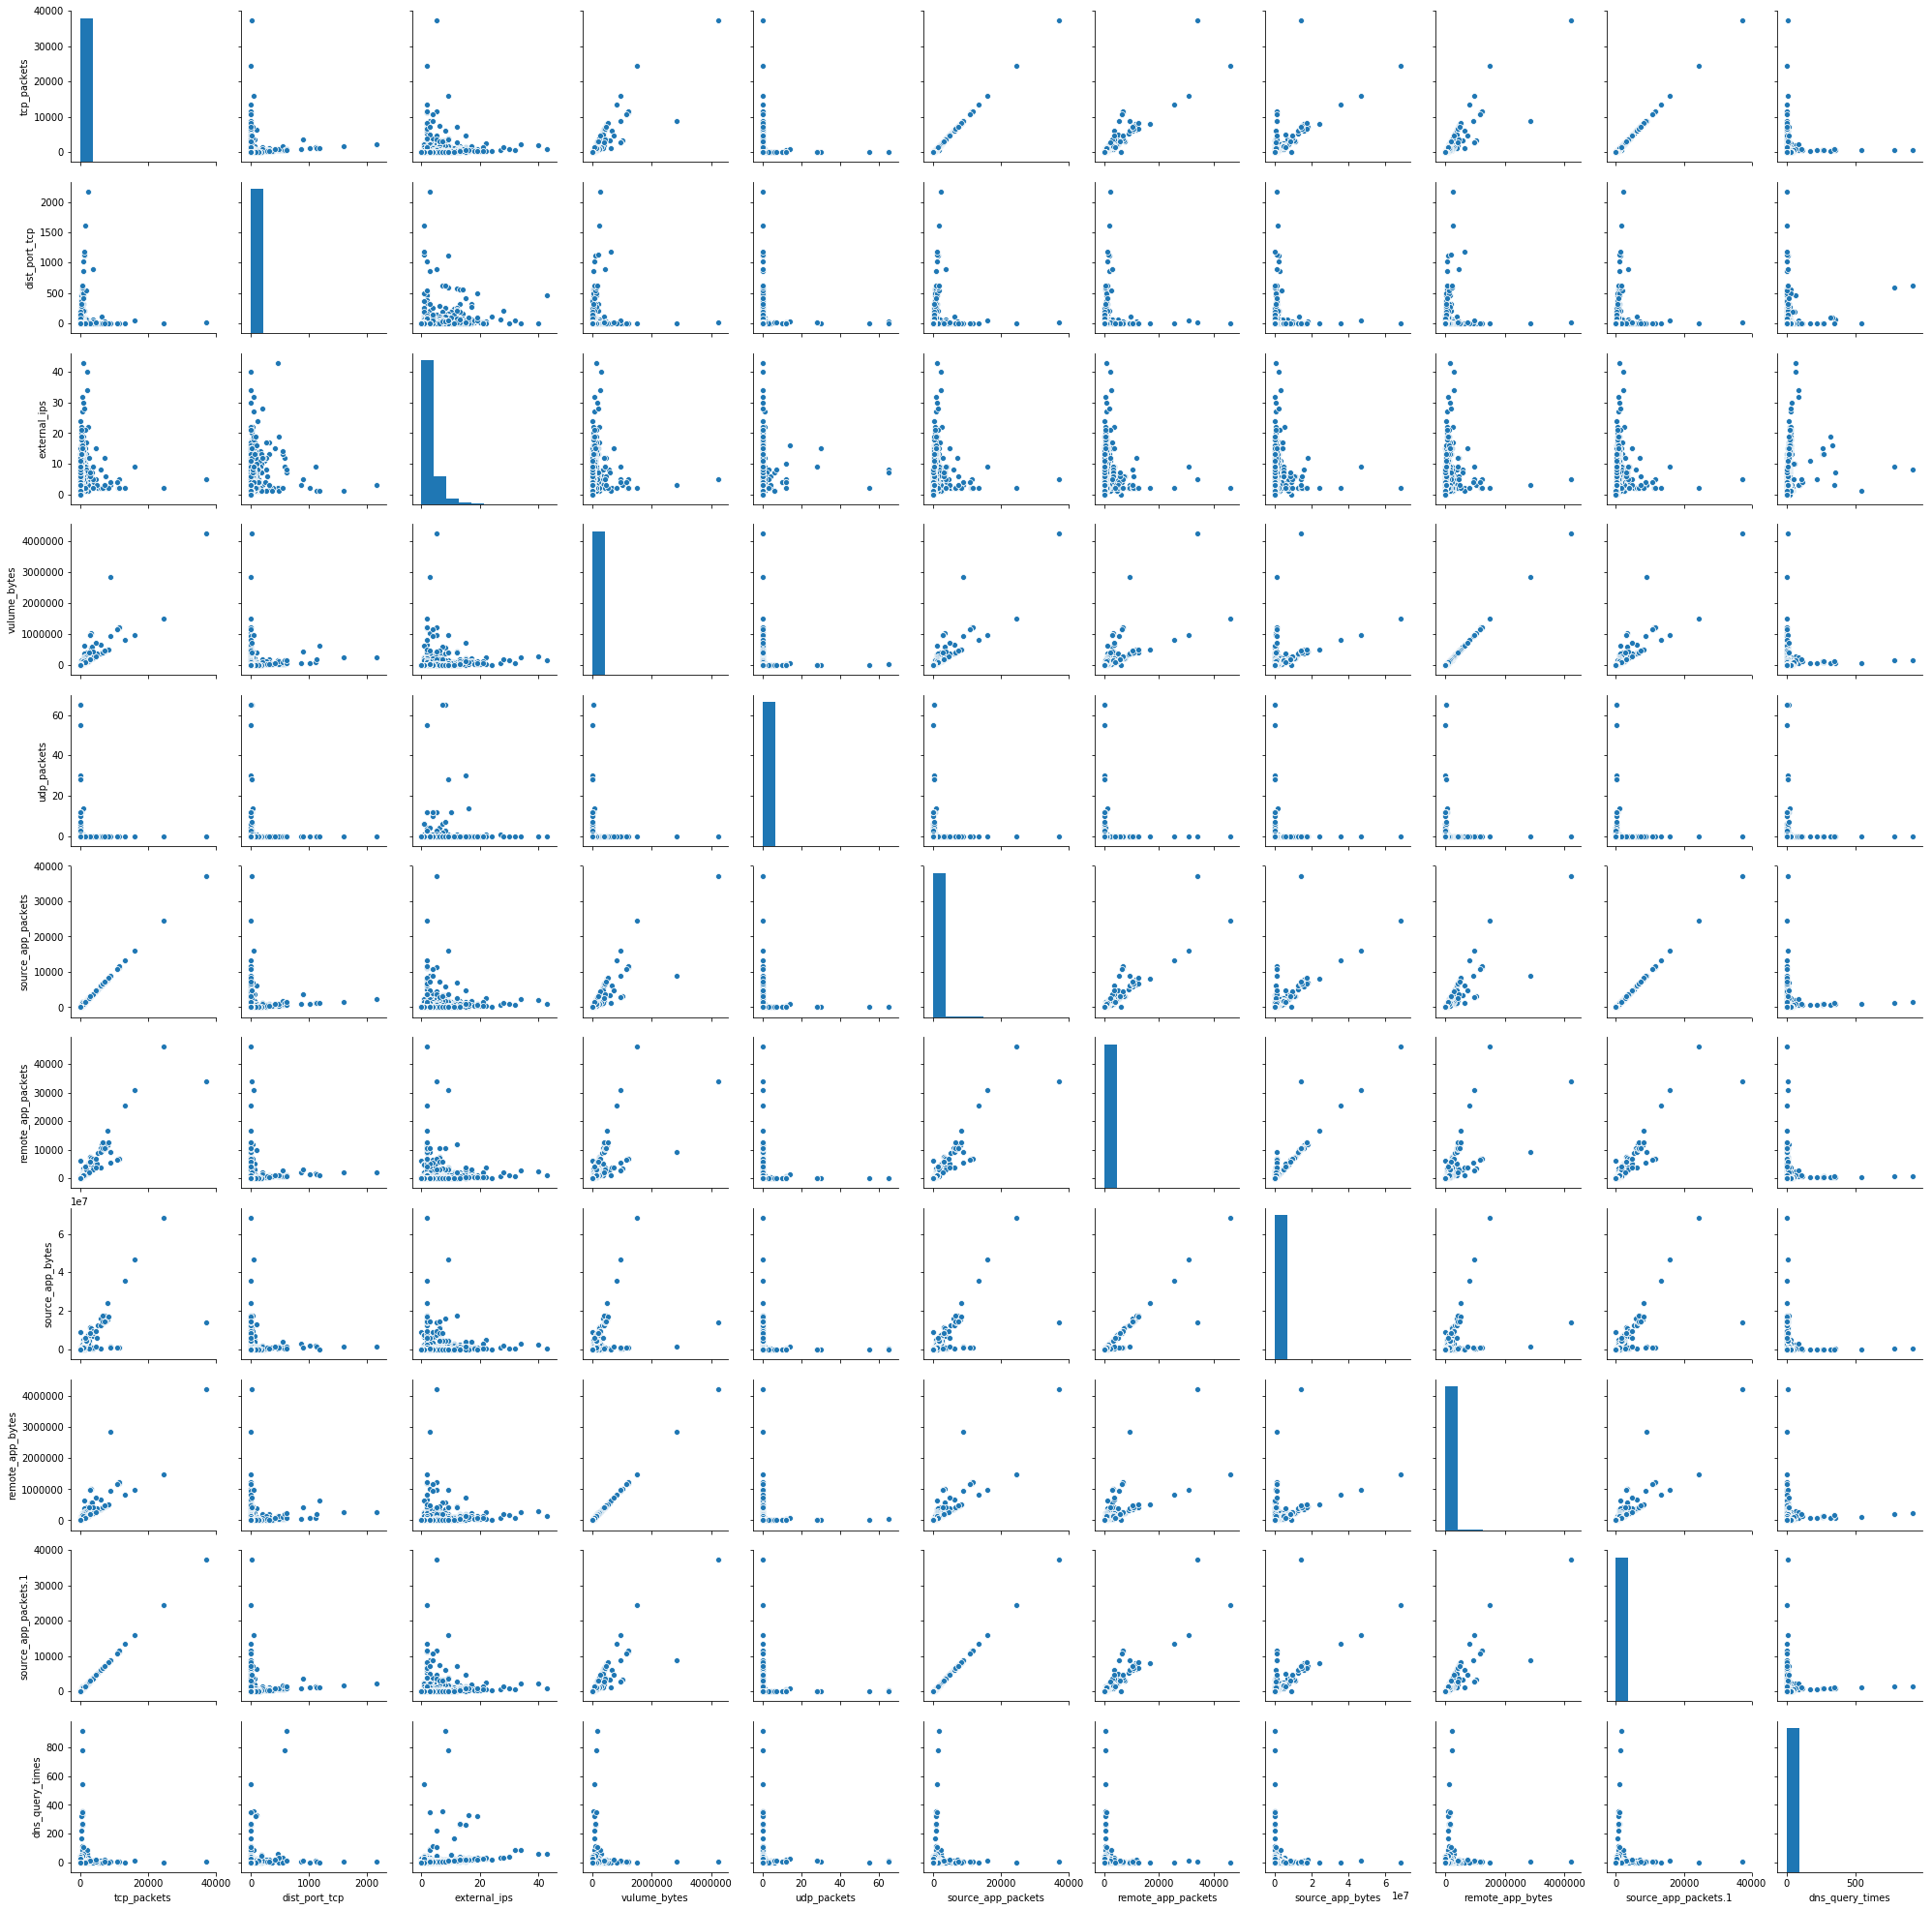

In [22]:
sns.pairplot(data)

In [23]:
data=data[data.tcp_packets<20000].copy()
data=data[data.dist_port_tcp<1400].copy()
data=data[data.external_ips<35].copy()
data=data[data.vulume_bytes<2000000].copy()
data=data[data.udp_packets<40].copy()
data=data[data.remote_app_packets<15000].copy()

In [25]:
data[data.duplicated()].sum()

name                    AntiVirusAntiVirusAntiVirusAntiVirusAntiVirusA...
tcp_packets                                                         15038
dist_port_tcp                                                        3514
external_ips                                                         1434
vulume_bytes                                                      2061210
udp_packets                                                            38
source_app_packets                                                  21720
remote_app_packets                                                  18841
source_app_bytes                                                  8615120
remote_app_bytes                                                  2456160
source_app_packets.1                                                21720
dns_query_times                                                      5095
type                    benignbenignbenignbenignbenignbenignbenignbeni...
dtype: object

In [26]:
data=data.drop('source_app_packets.1',axis=1).copy()

In [28]:
data.to_csv('../../datasets/android_traffic_cleaned.csv',sep=';',index=False)

### Data pre-processing

In [37]:
data.iloc[:,1:11].columns

Index(['tcp_packets', 'dist_port_tcp', 'external_ips', 'vulume_bytes',
       'udp_packets', 'source_app_packets', 'remote_app_packets',
       'source_app_bytes', 'remote_app_bytes', 'dns_query_times'],
      dtype='object')

In [31]:
scaler = preprocessing.RobustScaler()
scaledData = scaler.fit_transform(data.iloc[:,1:11])
scaledData = pd.DataFrame(scaledData, columns=['tcp_packets','dist_port_tcp','external_ips','vulume_bytes','udp_packets','source_app_packets','remote_app_packets',' source_app_bytes','remote_app_bytes','dns_query_times'])

In [38]:
#scaledData=scaledData.join(data.type.astype("str"))

In [39]:
scaledData.head()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times,type
0,0.127907,6.0,0.333333,0.036782,0.0,0.100000,0.105882,0.041652,0.029865,0.0,benign
1,1.069767,0.0,2.333333,1.786894,0.0,1.088889,0.976471,0.897275,1.787684,2.0,benign
2,1.988372,0.0,1.333333,1.843764,0.0,1.944444,2.235294,6.465984,1.831939,1.5,benign
3,-0.220930,0.0,-0.333333,-0.233015,0.0,-0.255556,-0.211765,-0.131552,-0.245310,-0.5,benign
4,-0.220930,0.0,-0.333333,-0.233640,0.0,-0.255556,-0.211765,-0.131552,-0.245919,-0.5,benign


In [53]:
X_train, X_test, y_train, y_test = train_test_split(scaledData.iloc[:,0:10], data.type.astype("str"), test_size=0.25, random_state=45)

### Modeling

*Naive Bayes*

In [56]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
## accuracy
accuracy = accuracy_score(y_test,pred)
print("naive_bayes")
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("COHEN")
print(cohen_kappa_score(y_test, pred))

naive_bayes
0.44688457609805926
              precision    recall  f1-score   support

      benign       0.81      0.12      0.20      1190
   malicious       0.41      0.96      0.58       768

   micro avg       0.45      0.45      0.45      1958
   macro avg       0.61      0.54      0.39      1958
weighted avg       0.66      0.45      0.35      1958

COHEN
0.06082933470572538


*Decision Tree*

In [57]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(y_test,pred)
print(clf)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("COHEN")
print(cohen_kappa_score(y_test, pred))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.8799795709908069
              precision    recall  f1-score   support

      benign       0.90      0.90      0.90      1190
   malicious       0.84      0.85      0.85       768

   micro avg       0.88      0.88      0.88      1958
   macro avg       0.87      0.87      0.87      1958
weighted avg       0.88      0.88      0.88      1958

COHEN
0.7486718877164771


*KNeighborsClassifier*

In [59]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh_two = KNeighborsClassifier(n_neighbors=3)
neigh_three = KNeighborsClassifier(n_neighbors=4)
neigh_four = KNeighborsClassifier(n_neighbors=6)

neigh.fit(X_train, y_train)
neigh_two.fit(X_train, y_train)
neigh_three.fit(X_train, y_train)
neigh_four.fit(X_train, y_train)

pred = neigh.predict(X_test)
pred_two = neigh_two.predict(X_test)
pred_three = neigh_three.predict(X_test)
pred_four = neigh_four.predict(X_test)
# accuracy
accuracy = accuracy_score(y_test,pred)
accuracy_two = accuracy_score(y_test,pred_two)
accuracy_three = accuracy_score(y_test,pred_three)
accuracy_four = accuracy_score(y_test,pred_four)

print("kneighbors 2")
print(accuracy)
print(classification_report(y_test, pred, labels=None))
print("COHEN2")
print(cohen_kappa_score(y_test, pred))
print("")
print("kneighbors 3")
print(accuracy_two)
print(classification_report(y_test, pred_two,labels=None))
print("COHEN3")
print(cohen_kappa_score(y_test, pred_two))
print("")
print("kneighbors 4")
print(accuracy_three)
print(classification_report(y_test, pred_three, labels=None))
print("COHEN4")
print(cohen_kappa_score(y_test, pred_three))
print("")
print("kneighbors 6")
print(accuracy_four)
print(classification_report(y_test, pred_four,labels=None))
print("COHEN6")
print(cohen_kappa_score(y_test, pred_four))

kneighbors 2
0.8907048008171604
              precision    recall  f1-score   support

      benign       0.88      0.95      0.91      1190
   malicious       0.91      0.80      0.85       768

   micro avg       0.89      0.89      0.89      1958
   macro avg       0.90      0.87      0.88      1958
weighted avg       0.89      0.89      0.89      1958

COHEN2
0.7655651340996168

kneighbors 3
0.8861082737487231
              precision    recall  f1-score   support

      benign       0.91      0.90      0.91      1190
   malicious       0.85      0.87      0.86       768

   micro avg       0.89      0.89      0.89      1958
   macro avg       0.88      0.88      0.88      1958
weighted avg       0.89      0.89      0.89      1958

COHEN3
0.7620541314671169

kneighbors 4
0.8922369765066395
              precision    recall  f1-score   support

      benign       0.89      0.93      0.91      1190
   malicious       0.89      0.83      0.86       768

   micro avg       0.89      0.8

*SVM*

In [60]:
Sv=svm.SVC(gamma='scale',kernel='rbf')
Sv.fit(X_train, y_train)

pred = Sv.predict(X_test)
# accuracy
accuracy = accuracy_score(y_test,pred)
print(Sv)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("COHEN")
print(cohen_kappa_score(y_test, pred))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.627170582226762
              precision    recall  f1-score   support

      benign       0.62      1.00      0.76      1190
   malicious       0.90      0.06      0.11       768

   micro avg       0.63      0.63      0.63      1958
   macro avg       0.76      0.53      0.43      1958
weighted avg       0.73      0.63      0.51      1958

COHEN
0.06211286089238832


*Random Forest*

In [65]:
rdF=RandomForestClassifier(n_estimators=250, max_depth=50,random_state=45)
rdF.fit(X_train,y_train)
pred=rdF.predict(X_test)
cm=confusion_matrix(y_test, pred)

accuracy = accuracy_score(y_test,pred)
print(rdF)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("COHEN")
print(cohen_kappa_score(y_test, pred))
print(cm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=45, verbose=0, warm_start=False)
0.9172625127681308
              precision    recall  f1-score   support

      benign       0.93      0.94      0.93      1190
   malicious       0.90      0.88      0.89       768

   micro avg       0.92      0.92      0.92      1958
   macro avg       0.91      0.91      0.91      1958
weighted avg       0.92      0.92      0.92      1958

COHEN
0.8258206083396299
[[1117   73]
 [  89  679]]
